In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('./data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.corr()['price']

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

In [6]:
df.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [7]:
house = df.copy()

In [8]:
house = house.drop(['id', 'date'], axis=1)

In [9]:
house['grade'] = house['grade'].map(lambda x: x.split()[0])
house['grade'] = house['grade'].astype(int)

In [10]:
house['waterfront'].fillna("NO", inplace = True)

In [11]:
house['waterfront'].replace(('NO', 'YES'), (0, 1), inplace=True)

In [12]:
# dropping 63 records with null view values
house = house.dropna(subset=['view'])

In [13]:
house = house.drop(['yr_renovated'], axis=1)

In [14]:
house = house.drop(['sqft_basement'], axis=1)

In [15]:
house['zipcode'] = house['zipcode'].astype(object)

In [16]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21534 non-null  float64
 1   bedrooms       21534 non-null  int64  
 2   bathrooms      21534 non-null  float64
 3   sqft_living    21534 non-null  int64  
 4   sqft_lot       21534 non-null  int64  
 5   floors         21534 non-null  float64
 6   waterfront     21534 non-null  int64  
 7   view           21534 non-null  object 
 8   condition      21534 non-null  object 
 9   grade          21534 non-null  int64  
 10  sqft_above     21534 non-null  int64  
 11  yr_built       21534 non-null  int64  
 12  zipcode        21534 non-null  object 
 13  lat            21534 non-null  float64
 14  long           21534 non-null  float64
 15  sqft_living15  21534 non-null  int64  
 16  sqft_lot15     21534 non-null  int64  
dtypes: float64(5), int64(9), object(3)
memory usage: 3

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

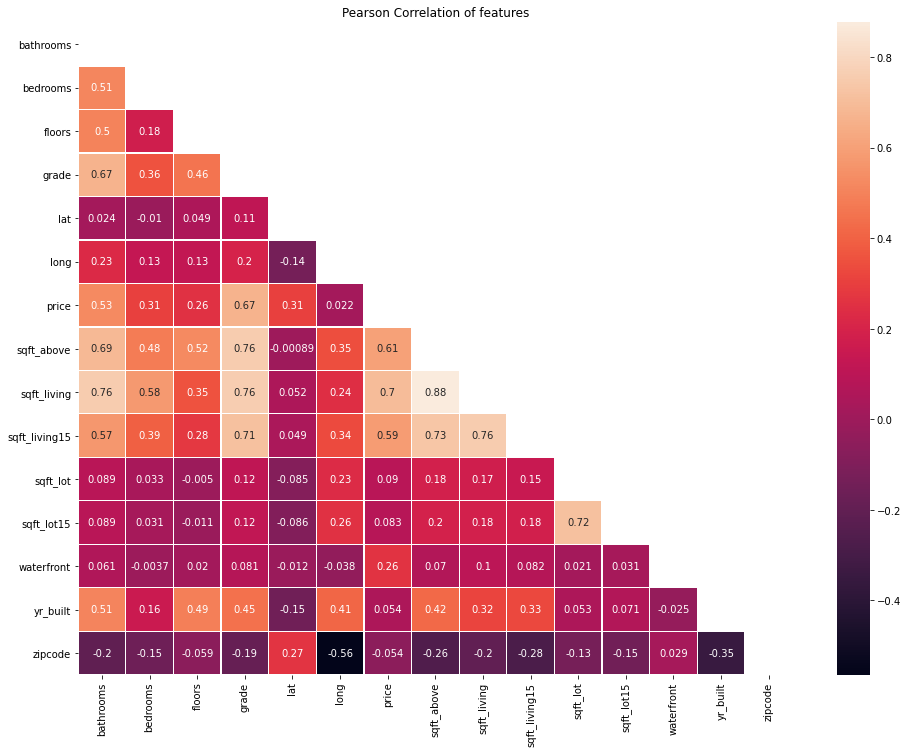

In [17]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in house.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = house.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = house[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25, annot=True, mask=np.triu(np.ones_like(num_list, dtype=bool)))


In [18]:
#sns.pairplot(house)

In [19]:
popdf = pd.read_csv('./data/popdata.csv')

In [20]:
popdf.head()

,zip,city,county,pop
0,99301,Pasco,Franklin,79819
1,98052,Redmond,King,70245
2,98012,Bothell,Snohomish,67427
3,98682,Vancouver,Clark,60887
4,98208,Everett,Snohomish,58162


In [21]:
popdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     592 non-null    int64 
 1   city    592 non-null    object
 2   county  592 non-null    object
 3   pop     592 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 18.6+ KB


In [22]:
areadf = pd.read_csv('./data/KC_area.csv',header=1)

In [23]:
areadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  0 non-null      float64
 1   ZIP Code                    522 non-null    int64  
 2   City                        522 non-null    object 
 3   County                      522 non-null    object 
 4   Land Area (Sq. Meters)      522 non-null    object 
 5   Land Area (Sq. Miles)       522 non-null    object 
 6   Land Area (Sq. Kilometers)  522 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.7+ KB


In [24]:
areadf.drop(areadf.columns[0],axis= 1,inplace=True)

In [25]:
areadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ZIP Code                    522 non-null    int64 
 1   City                        522 non-null    object
 2   County                      522 non-null    object
 3   Land Area (Sq. Meters)      522 non-null    object
 4   Land Area (Sq. Miles)       522 non-null    object
 5   Land Area (Sq. Kilometers)  522 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.6+ KB


In [26]:
areadf.head()

,ZIP Code,City,County,Land Area (Sq. Meters),Land Area (Sq. Miles),Land Area (Sq. Kilometers)
0,98001,"Algona, Auburn, Federal Way, Lakeland North, L...",King County,"48,144,700",19,48
1,98002,"Auburn, Pacific",King County,"18,530,000",7,19
2,98003,"Federal Way, Lakeland South, Milton",King County,"30,089,500",12,30
3,98004,"Beaux Arts Village, Bellevue, Clyde Hill, Hunt...",King County,"18,200,300",7,18
4,98005,Bellevue,King County,"19,429,600",8,19


In [27]:
king_pop = popdf[popdf["county"]=='King']

In [28]:
king_area = areadf[areadf["County"]=="King County"]

In [29]:
pd.concat([popdf, areadf], axis=1, join="inner")

,zip,city,county,pop,ZIP Code,City,County,Land Area (Sq. Meters),Land Area (Sq. Miles),Land Area (Sq. Kilometers)
0,99301,Pasco,Franklin,79819,98001,"Algona, Auburn, Federal Way, Lakeland North, L...",King County,"48,144,700",19,48
1,98052,Redmond,King,70245,98002,"Auburn, Pacific",King County,"18,530,000",7,19
2,98012,Bothell,Snohomish,67427,98003,"Federal Way, Lakeland South, Milton",King County,"30,089,500",12,30
3,98682,Vancouver,Clark,60887,98004,"Beaux Arts Village, Bellevue, Clyde Hill, Hunt...",King County,"18,200,300",7,18
4,98208,Everett,Snohomish,58162,98005,Bellevue,King County,"19,429,600",8,19
...,...,...,...,...,...,...,...,...,...,...
517,99124,Elmer City,Okanogan,271,99362,"College Place, Garrett, Walla Walla, Walla Wal...","Umatilla County, Walla Walla County","740,792,000",286,741
518,98621,Grays River,Wahkiakum,269,99363,Wallula,Walla Walla County,"115,344,000",45,115
519,98628,Klickitat,Klickitat,263,99371,Washtucna,"Adams County, Franklin County","527,778,000",204,528
520,99322,Bickleton,Klickitat,242,99402,Asotin,Asotin County,"741,921,000",286,742


In [30]:
king_data = pd.merge(
    king_area,
    king_pop,
    how="inner",
    on=None,
    left_on="ZIP Code",
    right_on='zip',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

In [31]:
king_data.head()

,ZIP Code,City,County,Land Area (Sq. Meters),Land Area (Sq. Miles),Land Area (Sq. Kilometers),zip,city,county,pop
0,98001,"Algona, Auburn, Federal Way, Lakeland North, L...",King County,"48,144,700",19,48,98001,Auburn,King,33699
1,98002,"Auburn, Pacific",King County,"18,530,000",7,19,98002,Auburn,King,33468
2,98003,"Federal Way, Lakeland South, Milton",King County,"30,089,500",12,30,98003,Federal Way,King,49533
3,98004,"Beaux Arts Village, Bellevue, Clyde Hill, Hunt...",King County,"18,200,300",7,18,98004,Bellevue,King,36202
4,98005,Bellevue,King County,"19,429,600",8,19,98005,Bellevue,King,19223


In [32]:
king_data_compact =king_data.drop(columns=['City','County','Land Area (Sq. Miles)','Land Area (Sq. Kilometers)','zip'])

In [33]:
king_data_compact.head()

,ZIP Code,Land Area (Sq. Meters),city,county,pop
0,98001,"48,144,700",Auburn,King,33699
1,98002,"18,530,000",Auburn,King,33468
2,98003,"30,089,500",Federal Way,King,49533
3,98004,"18,200,300",Bellevue,King,36202
4,98005,"19,429,600",Bellevue,King,19223


In [34]:
king_data_compact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ZIP Code                78 non-null     int64 
 1   Land Area (Sq. Meters)  78 non-null     object
 2   city                    78 non-null     object
 3   county                  78 non-null     object
 4   pop                     78 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.7+ KB


In [35]:
for x in king_data_compact['Land Area (Sq. Meters)']:
    x.replace(",",'')
    print(x)
    #int(x)

48,144,700
18,530,000
30,089,500
18,200,300
19,429,600
27,685,300
11,341,200
14,250,600
38,991,700
21,201,100
117,347,000
197,688,000
26,727,700
61,945,400
144,495,000
14,667,600
23,189,900
19,424,900
43,315,900
24,062,600
23,633,800
172,207,000
3,737,880
16,370,400
73,577,400
872,796,000
132,339,000
52,054,000
73,465,100
12,374,000
19,466,200
15,780,800
49,037,400
51,737,400
191,905,000
95,633,800
27,654,800
24,552,300
1,344,750
3,396,110
12,005,500
2,007,030
10,689,300
14,236,500
5,704,030
19,384,700
5,178,190
8,187,980
17,051,600
7,657,200
10,214,500
16,178,200
6,308,530
1,141,210
5,992,910
13,960,900
7,963,650
18,379,000
8,738,520
5,954,030
8,818,480
12,045,900
8,117,260
9,147
19,604,400
5,726,910
9,165
14,685,900
23,030,100
9,145
14,752,900
12,564,300
19,551,300
183,452
20,167,200
10,815,400
510,454,000
547,876,000


In [36]:
def remove_chars(ds,char):
    """
    remove characters from the data series
    -
    ds: data series, lists. Element in data series or list must be a string.
    char: character to be removed. Accepts lists
    """
    for char in char:
        idx = 0
        for row in ds:
            if char in row:
                ds[idx] = row.replace(char,"")
            idx +=1
    return ds

In [37]:
remove_chars(king_data_compact["Land Area (Sq. Meters)"],',')

<ipython-input-36-968c3d56aa1e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[idx] = row.replace(char,"")


0      48144700
1      18530000
2      30089500
3      18200300
4      19429600
        ...    
73       183452
74     20167200
75     10815400
76    510454000
77    547876000
Name: Land Area (Sq. Meters), Length: 78, dtype: object

In [38]:
king_data_compact['Land Area (Sq. Meters)']= king_data_compact['Land Area (Sq. Meters)'].astype(int)

In [39]:
king_data_compact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ZIP Code                78 non-null     int64 
 1   Land Area (Sq. Meters)  78 non-null     int64 
 2   city                    78 non-null     object
 3   county                  78 non-null     object
 4   pop                     78 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ KB


In [40]:
king_data_compact['density'] = king_data_compact['pop'] / king_data_compact['Land Area (Sq. Meters)']

In [41]:
king_data_compact.head()

,ZIP Code,Land Area (Sq. Meters),city,county,pop,density
0,98001,48144700,Auburn,King,33699,0.000700
1,98002,18530000,Auburn,King,33468,0.001806
2,98003,30089500,Federal Way,King,49533,0.001646
3,98004,18200300,Bellevue,King,36202,0.001989
4,98005,19429600,Bellevue,King,19223,0.000989


In [42]:
merged_king_data = pd.merge(
    house,
    king_data_compact,
    how="inner",
    on=None,
    left_on="zipcode",
    right_on='ZIP Code',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

In [43]:
merged_king_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20228 entries, 0 to 20227
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   20228 non-null  float64
 1   bedrooms                20228 non-null  int64  
 2   bathrooms               20228 non-null  float64
 3   sqft_living             20228 non-null  int64  
 4   sqft_lot                20228 non-null  int64  
 5   floors                  20228 non-null  float64
 6   waterfront              20228 non-null  int64  
 7   view                    20228 non-null  object 
 8   condition               20228 non-null  object 
 9   grade                   20228 non-null  int64  
 10  sqft_above              20228 non-null  int64  
 11  yr_built                20228 non-null  int64  
 12  zipcode                 20228 non-null  object 
 13  lat                     20228 non-null  float64
 14  long                    20228 non-null

In [44]:
merged_king_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,ZIP Code,Land Area (Sq. Meters),city,county,pop,density
0,240000.0,4,1.0,1220,8075,1.0,0,NONE,Fair,7,...,47.3341,-122.282,1290,7800,98001,48144700,Auburn,King,33699,0.0007
1,287000.0,4,2.5,2240,4648,2.0,0,NONE,Average,7,...,47.3378,-122.257,2221,4557,98001,48144700,Auburn,King,33699,0.0007
2,465000.0,3,2.5,2714,17936,2.0,0,NONE,Average,9,...,47.3185,-122.275,2590,18386,98001,48144700,Auburn,King,33699,0.0007
3,360000.0,4,2.5,2160,9528,2.0,0,NONE,Average,9,...,47.3341,-122.255,2280,9937,98001,48144700,Auburn,King,33699,0.0007
4,230000.0,3,2.0,1450,11204,1.0,0,NONE,Average,7,...,47.2639,-122.252,1520,9518,98001,48144700,Auburn,King,33699,0.0007


In [45]:
merged_king_data['zipcode']== merged_king_data["ZIP Code"]

0        True
1        True
2        True
3        True
4        True
         ... 
20223    True
20224    True
20225    True
20226    True
20227    True
Length: 20228, dtype: bool

In [46]:
#merged_king_data.to_csv('./data/merged.csv',index= False)

In [47]:
merged_king_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,ZIP Code,Land Area (Sq. Meters),city,county,pop,density
0,240000.0,4,1.00,1220,8075,1.0,0,NONE,Fair,7,...,47.3341,-122.282,1290,7800,98001,48144700,Auburn,King,33699,0.000700
1,287000.0,4,2.50,2240,4648,2.0,0,NONE,Average,7,...,47.3378,-122.257,2221,4557,98001,48144700,Auburn,King,33699,0.000700
2,465000.0,3,2.50,2714,17936,2.0,0,NONE,Average,9,...,47.3185,-122.275,2590,18386,98001,48144700,Auburn,King,33699,0.000700
3,360000.0,4,2.50,2160,9528,2.0,0,NONE,Average,9,...,47.3341,-122.255,2280,9937,98001,48144700,Auburn,King,33699,0.000700
4,230000.0,3,2.00,1450,11204,1.0,0,NONE,Average,7,...,47.2639,-122.252,1520,9518,98001,48144700,Auburn,King,33699,0.000700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20223,570000.0,3,3.25,1550,1280,2.0,0,NONE,Average,9,...,47.6493,-122.384,1550,1579,98199,10815400,Seattle,King,22720,0.002101
20224,1110000.0,4,3.50,3660,4760,2.0,0,NONE,Average,9,...,47.6482,-122.409,3210,4640,98199,10815400,Seattle,King,22720,0.002101
20225,1010000.0,4,3.25,3610,4000,2.0,0,NONE,Average,9,...,47.6580,-122.396,1980,4000,98199,10815400,Seattle,King,22720,0.002101
20226,453000.0,3,2.50,1510,1618,2.5,0,NONE,Average,8,...,47.6515,-122.384,1350,1397,98199,10815400,Seattle,King,22720,0.002101


In [48]:
merged_king_data.drop(columns=['zipcode','county'], inplace=True)

In [49]:
merged_king_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20228 entries, 0 to 20227
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   20228 non-null  float64
 1   bedrooms                20228 non-null  int64  
 2   bathrooms               20228 non-null  float64
 3   sqft_living             20228 non-null  int64  
 4   sqft_lot                20228 non-null  int64  
 5   floors                  20228 non-null  float64
 6   waterfront              20228 non-null  int64  
 7   view                    20228 non-null  object 
 8   condition               20228 non-null  object 
 9   grade                   20228 non-null  int64  
 10  sqft_above              20228 non-null  int64  
 11  yr_built                20228 non-null  int64  
 12  lat                     20228 non-null  float64
 13  long                    20228 non-null  float64
 14  sqft_living15           20228 non-null

In [50]:
merged_king_data['grade']= merged_king_data['grade'].astype(object)

In [51]:
merged_king_data.drop(columns=['density','pop','Land Area (Sq. Meters)','ZIP Code','waterfront','lat','long'],inplace=True)

In [52]:
merged_king_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20228 entries, 0 to 20227
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20228 non-null  float64
 1   bedrooms       20228 non-null  int64  
 2   bathrooms      20228 non-null  float64
 3   sqft_living    20228 non-null  int64  
 4   sqft_lot       20228 non-null  int64  
 5   floors         20228 non-null  float64
 6   view           20228 non-null  object 
 7   condition      20228 non-null  object 
 8   grade          20228 non-null  object 
 9   sqft_above     20228 non-null  int64  
 10  yr_built       20228 non-null  int64  
 11  sqft_living15  20228 non-null  int64  
 12  sqft_lot15     20228 non-null  int64  
 13  city           20228 non-null  object 
dtypes: float64(3), int64(7), object(4)
memory usage: 2.3+ MB


In [53]:
X = merged_king_data.drop(columns='price')
y = merged_king_data['price']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [55]:
cat_cols = [c for c in merged_king_data if merged_king_data[c].dtype == 'O']
cat_cols

['view', 'condition', 'grade', 'city']

In [56]:
X_train.describe(include=['O'])

,view,condition,grade,city
count,15171,15171,15171,15171
unique,5,5,10,22
top,NONE,Average,7,Seattle
freq,13647,9852,6319,6750


In [57]:
# Import our One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
# Going to use ColumnTransformer to encode only cat cols
from sklearn.compose import ColumnTransformer

In [58]:
encoder = OneHotEncoder(handle_unknown='error',
                        drop='if_binary', 
                        categories='auto')

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')

ct.fit(X_train)
X_train_enc = ct.transform(X_train)
X_test_enc = ct.transform(X_test)

In [59]:
X_train_enc.todense()

matrix([[    0.,     0.,     0., ...,  2002.,  3420., 23274.],
        [    0.,     0.,     0., ...,  1953.,  1440.,  5102.],
        [    0.,     0.,     0., ...,  1949.,  2230., 11900.],
        ...,
        [    0.,     0.,     0., ...,  1978.,  2020.,  7300.],
        [    0.,     0.,     0., ...,  1958.,  3450., 33945.],
        [    0.,     0.,     0., ...,  2007.,  1405.,  3000.]])

In [60]:
X_train_enc = pd.DataFrame(X_train_enc.todense(), columns= ct.get_feature_names())
X_train_enc


,ohe__x0_AVERAGE,ohe__x0_EXCELLENT,ohe__x0_FAIR,ohe__x0_GOOD,ohe__x0_NONE,ohe__x1_Average,ohe__x1_Fair,ohe__x1_Good,ohe__x1_Poor,ohe__x1_Very Good,...,ohe__x3_Vashon,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,2.50,3340.0,24755.0,2.0,3340.0,2002.0,3420.0,23274.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,1.00,1650.0,5102.0,1.0,1300.0,1953.0,1440.0,5102.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.75,2230.0,13529.0,1.0,2230.0,1949.0,2230.0,11900.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,1.75,1640.0,7194.0,1.5,1480.0,1915.0,1440.0,9405.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,1.00,1420.0,11040.0,1.0,1420.0,1961.0,1530.0,8208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,4.0,1.75,1800.0,4180.0,2.0,1800.0,1921.0,2180.0,4620.0
15167,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.00,820.0,681.0,3.0,820.0,2006.0,820.0,1156.0
15168,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.50,2390.0,6435.0,1.0,1600.0,1978.0,2020.0,7300.0
15169,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,3.50,4220.0,26784.0,1.0,2110.0,1958.0,3450.0,33945.0


In [61]:
X_test_enc = pd.DataFrame(X_test_enc.todense(), columns= ct.get_feature_names())
X_test_enc

,ohe__x0_AVERAGE,ohe__x0_EXCELLENT,ohe__x0_FAIR,ohe__x0_GOOD,ohe__x0_NONE,ohe__x1_Average,ohe__x1_Fair,ohe__x1_Good,ohe__x1_Poor,ohe__x1_Very Good,...,ohe__x3_Vashon,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,2.50,1500.0,1375.0,2.0,1200.0,2014.0,1680.0,1627.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,7.0,2.75,3110.0,4400.0,1.5,2010.0,1914.0,1240.0,4280.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.50,1460.0,5700.0,1.5,1460.0,1912.0,1780.0,3800.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,2.00,1460.0,7860.0,1.0,1460.0,1967.0,1850.0,8148.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,3.0,1.00,1020.0,10200.0,1.0,1020.0,1954.0,1170.0,8188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,2.00,1690.0,10062.0,1.0,940.0,1928.0,2390.0,6650.0
5053,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.50,1460.0,1296.0,2.0,1160.0,2008.0,1460.0,1296.0
5054,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.00,1210.0,10185.0,1.0,1210.0,1957.0,1320.0,10245.0
5055,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.50,1780.0,2493.0,3.0,1780.0,1981.0,2050.0,4400.0
